In [38]:
# dependecies and set up
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


In [39]:
file = "Resources/world-happiness-report.csv"
df = pd.read_csv(file)
df.head()

Country name  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008        3.724               7.370           0.451   
1  Afghanistan  2009        4.402               7.540           0.552   
2  Afghanistan  2010        4.758               7.647           0.539   
3  Afghanistan  2011        3.832               7.620           0.521   
4  Afghanistan  2012        3.783               7.705           0.521   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                             50.80                         0.718       0.168   
1                             51.20                         0.679       0.190   
2                             51.60                         0.600       0.121   
3                             51.92                         0.496       0.162   
4                             52.24                         0.531       0.236   

   Perceptions of corruption  Positive affect  Negative affect  
0                      0.882            0.518            0.258  
1                      0.850            0.584            0.237  
2                      0.707            0.618            0.275  
3                      0.731            0.611            0.267  
4                      0.776            0.710            0.268

In [40]:
print(df.shape)
print('--------------------')
print(df.columns)

(1949, 11)
--------------------
Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


In [42]:
df.isnull().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                      22
Negative affect                      16
dtype: int64

In [43]:
df.rename({'Country name': 'Country', 'Life Ladder':'Ladder score', 'Log GDP per capita': 'GDP', 'Healthy life expectancy at birth': 'Life expectancy', 
          'Freedom to make life choices': 'Freedom', 'Perceptions of corruption': 'corruption'}, axis=1, inplace=True)
df.head()

Country  year  Ladder score    GDP  Social support  Life expectancy  \
0  Afghanistan  2008         3.724  7.370           0.451            50.80   
1  Afghanistan  2009         4.402  7.540           0.552            51.20   
2  Afghanistan  2010         4.758  7.647           0.539            51.60   
3  Afghanistan  2011         3.832  7.620           0.521            51.92   
4  Afghanistan  2012         3.783  7.705           0.521            52.24   

   Freedom  Generosity  corruption  Positive affect  Negative affect  
0    0.718       0.168       0.882            0.518            0.258  
1    0.679       0.190       0.850            0.584            0.237  
2    0.600       0.121       0.707            0.618            0.275  
3    0.496       0.162       0.731            0.611            0.267  
4    0.531       0.236       0.776            0.710            0.268

In [44]:
 df.drop(columns=['Positive affect', 'Negative affect'], axis=1, inplace=True)


In [45]:
print(df.shape)
print(df.columns)

(1949, 9)
Index(['Country', 'year', 'Ladder score', 'GDP', 'Social support',
       'Life expectancy', 'Freedom', 'Generosity', 'corruption'],
      dtype='object')


In [46]:
for col in df.columns:
    print(col, df[col].nunique(), len(df))

Country 166 1949
year 16 1949
Ladder score 1553 1949
GDP 1500 1949
Social support 455 1949
Life expectancy 828 1949
Freedom 535 1949
Generosity 609 1949
corruption 572 1949


In [47]:
for var in df.columns:
    if df[var].isnull().sum()/len(df) > 0:
        print(var, df[var].isnull().mean().round(3))


GDP 0.018
Social support 0.007
Life expectancy 0.028
Freedom 0.016
Generosity 0.046
corruption 0.056


In [48]:
df.isnull().sum()

Country              0
year                 0
Ladder score         0
GDP                 36
Social support      13
Life expectancy     55
Freedom             32
Generosity          89
corruption         110
dtype: int64

In [49]:
df.tail()

Country  year  Ladder score    GDP  Social support  Life expectancy  \
1944  Zimbabwe  2016         3.735  7.984           0.768             54.4   
1945  Zimbabwe  2017         3.638  8.016           0.754             55.0   
1946  Zimbabwe  2018         3.616  8.049           0.775             55.6   
1947  Zimbabwe  2019         2.694  7.950           0.759             56.2   
1948  Zimbabwe  2020         3.160  7.829           0.717             56.8   

      Freedom  Generosity  corruption  
1944    0.733      -0.095       0.724  
1945    0.753      -0.098       0.751  
1946    0.763      -0.068       0.844  
1947    0.632      -0.064       0.831  
1948    0.643      -0.009       0.789

In [50]:
df.isnull().sum()

Country              0
year                 0
Ladder score         0
GDP                 36
Social support      13
Life expectancy     55
Freedom             32
Generosity          89
corruption         110
dtype: int64

In [51]:
for var in df.columns:
    if df[var].isnull().sum()/len(df) > 0:
        print(var, df[var].isnull().mean().round(3))

GDP 0.018
Social support 0.007
Life expectancy 0.028
Freedom 0.016
Generosity 0.046
corruption 0.056


### --------------------------------------------------------------------------------------------------------------------------------------------------------

# Importing the second datasets from 2021

In [52]:
#reading the world happiness report from 2021 
df1 = pd.read_csv("Resources/world-happiness-report-2021.csv")
df1.head(2)

Country name Regional indicator  year  Ladder score  \
0      Finland     Western Europe  2021         7.842   
1      Denmark     Western Europe  2021         7.620   

   Standard error of ladder score  upperwhisker  lowerwhisker  \
0                           0.032         7.904         7.780   
1                           0.035         7.687         7.552   

   Logged GDP per capita  Social support  Healthy life expectancy  ...  \
0                 10.775           0.954                     72.0  ...   
1                 10.933           0.954                     72.7  ...   

   Generosity  Perceptions of corruption  Ladder score in Dystopia  \
0      -0.098                      0.186                      2.43   
1       0.030                      0.179                      2.43   

   Explained by: Log GDP per capita  Explained by: Social support  \
0                             1.446                         1.106   
1                             1.502                         1.108   

   Explained by: Healthy life expectancy  \
0                                  0.741   
1                                  0.763   

   Explained by: Freedom to make life choices  Explained by: Generosity  \
0                                       0.691                     0.124   
1                                       0.686                     0.208   

   Explained by: Perceptions of corruption  Dystopia + residual  
0                                    0.481                3.253  
1                                    0.485                2.868  

[2 rows x 21 columns]

In [53]:
# Check if the dataset has a null value
df1.isnull().sum().head()

Country name                      0
Regional indicator                0
year                              0
Ladder score                      0
Standard error of ladder score    0
dtype: int64

In [54]:
#drop columns 
df1.drop(columns=['upperwhisker','Regional indicator', 'lowerwhisker','Explained by: Log GDP per capita', 'Explained by: Social support',
                  'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices', 
                  'Explained by: Freedom to make life choices', 'Explained by: Freedom to make life choices',
                  'Standard error of ladder score',
                  'Explained by: Generosity', 'Explained by: Generosity', 'Explained by: Perceptions of corruption',
                  'Dystopia + residual', 'Ladder score in Dystopia'], axis=1, inplace=True)

In [55]:
df1.head()

Country name  year  Ladder score  Logged GDP per capita  Social support  \
0      Finland  2021         7.842                 10.775           0.954   
1      Denmark  2021         7.620                 10.933           0.954   
2  Switzerland  2021         7.571                 11.117           0.942   
3      Iceland  2021         7.554                 10.878           0.983   
4  Netherlands  2021         7.464                 10.932           0.942   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                     72.0                         0.949      -0.098   
1                     72.7                         0.946       0.030   
2                     74.4                         0.919       0.025   
3                     73.0                         0.955       0.160   
4                     72.4                         0.913       0.175   

   Perceptions of corruption  
0                      0.186  
1                      0.179  
2                      0.292  
3                      0.673  
4                      0.338

In [56]:
#Renaming the datasets 
df1.rename({'Country name': 'Country', 'Logged GDP per capita': 'GDP', 'Healthy life expectancy': 'Life expectancy', 
          'Freedom to make life choices': 'Freedom', 'Perceptions of corruption': 'corruption'}, axis=1, inplace=True)
df1.head()

Country  year  Ladder score     GDP  Social support  Life expectancy  \
0      Finland  2021         7.842  10.775           0.954             72.0   
1      Denmark  2021         7.620  10.933           0.954             72.7   
2  Switzerland  2021         7.571  11.117           0.942             74.4   
3      Iceland  2021         7.554  10.878           0.983             73.0   
4  Netherlands  2021         7.464  10.932           0.942             72.4   

   Freedom  Generosity  corruption  
0    0.949      -0.098       0.186  
1    0.946       0.030       0.179  
2    0.919       0.025       0.292  
3    0.955       0.160       0.673  
4    0.913       0.175       0.338

In [57]:
len(df)

1949

In [58]:
len(df1)

149

In [59]:
frames = [df, df1]
df2 = pd.concat(frames)

df2.reset_index()

index      Country  year  Ladder score    GDP  Social support  \
0         0  Afghanistan  2008         3.724  7.370           0.451   
1         1  Afghanistan  2009         4.402  7.540           0.552   
2         2  Afghanistan  2010         4.758  7.647           0.539   
3         3  Afghanistan  2011         3.832  7.620           0.521   
4         4  Afghanistan  2012         3.783  7.705           0.521   
...     ...          ...   ...           ...    ...             ...   
2093    144      Lesotho  2021         3.512  7.926           0.787   
2094    145     Botswana  2021         3.467  9.782           0.784   
2095    146       Rwanda  2021         3.415  7.676           0.552   
2096    147     Zimbabwe  2021         3.145  7.943           0.750   
2097    148  Afghanistan  2021         2.523  7.695           0.463   

      Life expectancy  Freedom  Generosity  corruption  
0              50.800    0.718       0.168       0.882  
1              51.200    0.679       0.190       0.850  
2              51.600    0.600       0.121       0.707  
3              51.920    0.496       0.162       0.731  
4              52.240    0.531       0.236       0.776  
...               ...      ...         ...         ...  
2093           48.700    0.715      -0.131       0.915  
2094           59.269    0.824      -0.246       0.801  
2095           61.400    0.897       0.061       0.167  
2096           56.201    0.677      -0.047       0.821  
2097           52.493    0.382      -0.102       0.924  

[2098 rows x 10 columns]

In [60]:
#correlations
corr_df = df2[['Ladder score','GDP', 'Social support', 'Life expectancy', 'Freedom', 'Generosity', 'corruption']]
corr_df.corr().round(2).style.background_gradient(cmap='gray')

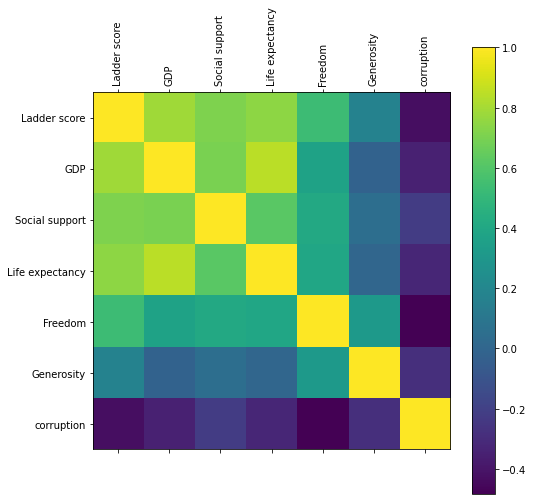

In [61]:
#Calculate the correlation matrix
corr_df = df2[['Ladder score','GDP', 'Social support', 'Life expectancy', 'Freedom', 'Generosity', 'corruption']]
data_corr = corr_df.corr()

#Plot the matrix
plt.rcParams["figure.figsize"] = (8,8)
plt.matshow(data_corr)

plt.xticks(range(len(corr_df.columns)), corr_df.columns, rotation=90)
plt.yticks(range(len(corr_df.columns)), corr_df.columns)

plt.colorbar()

plt.show()

In [62]:
df2.loc[(df2['year']>=2018)].tail()


Country  year  Ladder score    GDP  Social support  Life expectancy  \
144      Lesotho  2021         3.512  7.926           0.787           48.700   
145     Botswana  2021         3.467  9.782           0.784           59.269   
146       Rwanda  2021         3.415  7.676           0.552           61.400   
147     Zimbabwe  2021         3.145  7.943           0.750           56.201   
148  Afghanistan  2021         2.523  7.695           0.463           52.493   

     Freedom  Generosity  corruption  
144    0.715      -0.131       0.915  
145    0.824      -0.246       0.801  
146    0.897       0.061       0.167  
147    0.677      -0.047       0.821  
148    0.382      -0.102       0.924

In [63]:
df2.shape

(2098, 9)

In [64]:
# checking if the data has any null value after combining the two datasets
df2.isnull().sum()

Country              0
year                 0
Ladder score         0
GDP                 36
Social support      13
Life expectancy     55
Freedom             32
Generosity          89
corruption         110
dtype: int64

### Multiple Regression Model

In [65]:
#cleaning the data for regressiong analysis
data = df2.dropna(how='any',axis=0)
data.shape

(1861, 9)

In [66]:
data.isnull().sum()

Country            0
year               0
Ladder score       0
GDP                0
Social support     0
Life expectancy    0
Freedom            0
Generosity         0
corruption         0
dtype: int64

In [67]:
data.columns

Index(['Country', 'year', 'Ladder score', 'GDP', 'Social support',
       'Life expectancy', 'Freedom', 'Generosity', 'corruption'],
      dtype='object')

In [68]:
#Assigning x and y values
x=pd.DataFrame(data[['GDP', 'Life expectancy', 'Social support', 'Freedom', 'Generosity', 'corruption']])
y=pd.DataFrame(data["Ladder score"])
print(len(y))
print(len(x))

1861
1861


In [69]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)


In [70]:
LR = LinearRegression()

# fitting the training data
LR.fit(x_train,y_train)

regr = linear_model.LinearRegression()
regr.fit(x, y)

y_pred = LR.predict(x_test)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)
# print('Intercept: \n', logreg.intercept_)
# print('Coefficients: \n', logreg.coef_)

Intercept: 
 [-1.93499856]
Coefficients: 
 [[ 0.35692283  0.02910917  2.33077386  1.0862528   0.68807234 -0.64422495]]


In [71]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print('R2 socre is : ',score)
print('MSE is :',mean_squared_error(y_test,y_pred))
print('RMSE : ',np.sqrt(mean_squared_error(y_test,y_pred)))

R2 socre is :  0.7287192674718276
MSE is : 0.34047827112026263
RMSE :  0.5835051594632755


Text(0.5, 1.0, 'GDP vs Ladder score')

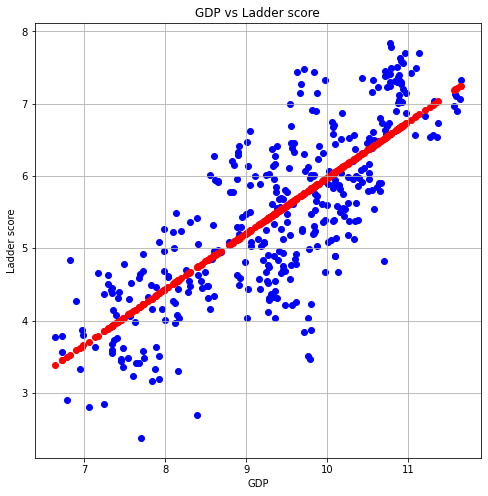

In [72]:
x=data['GDP'].values
y=data['Ladder score'].values

LR = LinearRegression()

x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=.20)

# fitting the training data
LR.fit(x_train.reshape(-1,1),y_train.reshape(-1,1).ravel())

regr = linear_model.LinearRegression()
#regr.fit(x, y)

y_pred = LR.predict(x_test.reshape(-1,1))

plt.grid()
plt.scatter(x_test, y_test, color = 'blue')
plt.scatter(x_test, y_pred, c='red', marker='o')
plt.ylabel('Ladder score', fontsize=10)
plt.xlabel('GDP', fontsize=10)
plt.title('GDP vs Ladder score')


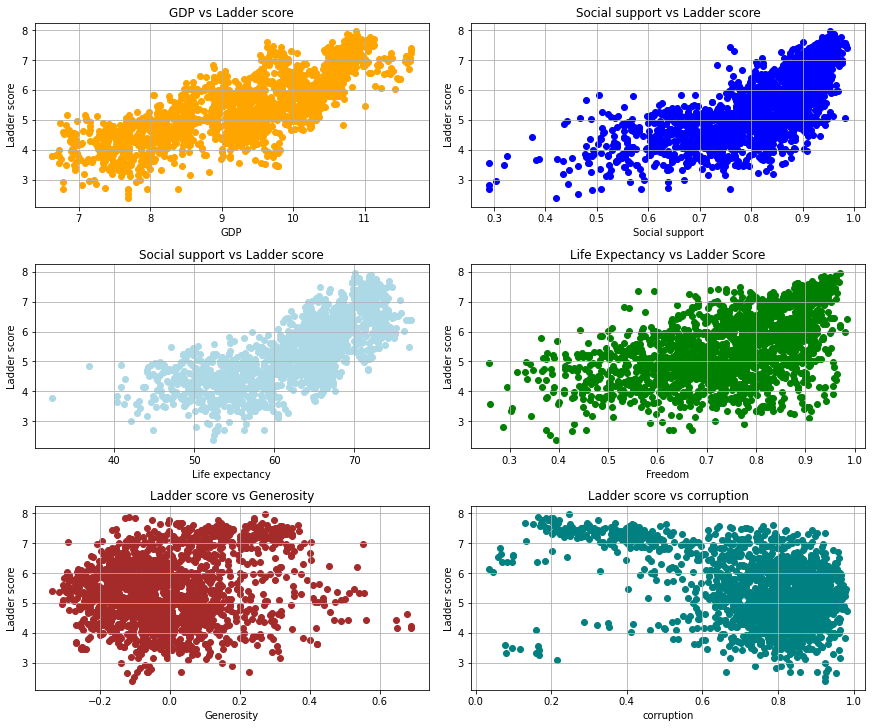

In [73]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6) ) = plt.subplots(3, 2, figsize=(12, 10), constrained_layout=True)
# fig.suptitle('Different Age Group Related to Distance from Home', size=15)

# plot 1st one 
df1 = data[['GDP', 'Ladder score']]
ax1.grid()
ax1.scatter(df1.GDP, df1['Ladder score'], c='orange', marker='o')
ax1.set_ylabel('Ladder score', fontsize=10)
ax1.set_xlabel('GDP', fontsize=10)
ax1.title.set_text('GDP vs Ladder score')

 # plot 2nd one
df2 = data[['Social support', 'Ladder score']]
ax2.grid()
ax2.scatter(df2['Social support'], df1['Ladder score'], c='blue', marker='o')
ax2.title.set_text('Social support vs Ladder score')
ax2.set_xlabel('Social support', fontsize=10)
ax2.set_ylabel('Ladder score', fontsize=10)



# # plot 3rd one
df3 = data[['Life expectancy', 'Ladder score']]
ax3.grid()
ax3.scatter(df3['Life expectancy'], df3['Ladder score'], c='lightblue', marker='o')
ax3.set_xlabel('Life expectancy', fontsize=10)
ax3.set_ylabel('Ladder score', fontsize=10)
ax3.title.set_text('Social support vs Ladder score')

# # plot 4th one
df4 = data[['Freedom', 'Ladder score']]
ax4.grid()
ax4.scatter(df4.Freedom, df4['Ladder score'], c='green', marker='o')
ax4.set_ylabel('Ladder score', fontsize=10)
ax4.set_xlabel('Freedom', fontsize=10)
ax4.title.set_text('Life Expectancy vs Ladder Score')

## Plot 5th
df5 = data[['Generosity', 'Ladder score']]
ax5.grid()
ax5.scatter(df5.Generosity, df5['Ladder score'], c='brown', marker='o')
ax5.set_ylabel('Ladder score', fontsize=10)
ax5.set_xlabel('Generosity', fontsize=10)
ax5.title.set_text('Ladder score vs Generosity')


df6 = data[['corruption', 'Ladder score']]
ax6.grid()
ax6.scatter(df6.corruption, df6['Ladder score'], c='teal', marker='o')
ax6.set_ylabel('Ladder score', fontsize=10)
ax6.set_xlabel('corruption', fontsize=10)
ax6.title.set_text('Ladder score vs corruption')
plt.show()

In [120]:
from sklearn.preprocessing import StandardScaler
from yellowbrick.regressor import PredictionError, ResidualsPlot
x=pd.DataFrame(data[['GDP', 'Life expectancy', 'Social support', 'Freedom', 'Generosity', 'corruption']])
y=pd.DataFrame(data["Ladder score"])
scaler = StandardScaler()

scaler.fit(x)
X = scaler.transform(x)
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

YellowbrickValueError: y must be a (1,) dimensional array not (559, 1)

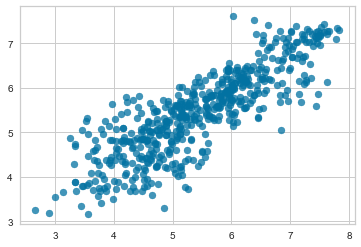

In [121]:
model1 = LinearRegression()
visualizer = PredictionError(model1)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.poof()

TypeError: 'numpy.ndarray' object is not callable

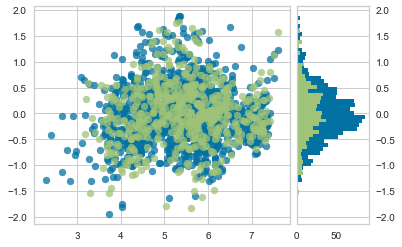

In [126]:
visualizer = ResidualsPlot(model1)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)
visualizer.size(15,6)
visualizer.poof()

C:\Users\abebe\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



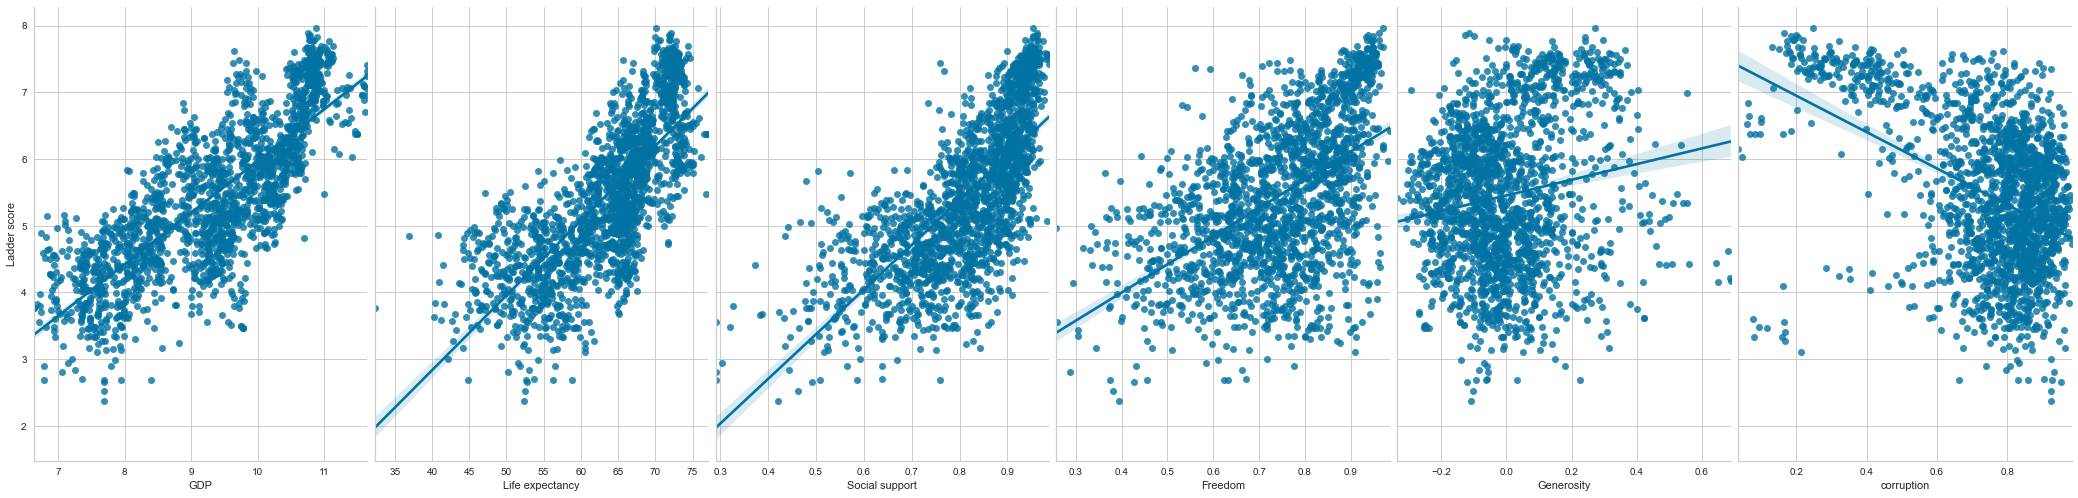

In [123]:
sns.pairplot(data, x_vars=['GDP', 'Life expectancy', 'Social support', 'Freedom', 'Generosity', 'corruption'], y_vars='Ladder score', size=7, aspect=0.7, kind='reg')

In [124]:
lm1.conf_int()

NameError: name 'lm1' is not defined

## Random Forrest Regression

In [103]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [104]:
# Import needed packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
%matplotlib inline

In [105]:
A=data['GDP'].values
a=data["Ladder score"].values

A_train, A_test, a_train, a_test=train_test_split(A, a, test_size=.20)

regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)

A_train = A_train.reshape(-1,1)
a_train = a_train.reshape(-1,1).ravel()
regressor.fit(A_train, a_train)

a_pred = regressor.predict(A_test.reshape(-1,1))


B=data['Social support'].values
b=data["Ladder score"].values

B_train, B_test, b_train, b_test=train_test_split(B, b, test_size=.20)

regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)

B_train = B_train.reshape(-1,1)
b_train = b_train.reshape(-1,1).ravel()
regressor.fit(B_train, b_train)

b_pred = regressor.predict(B_test.reshape(-1,1))


C=data['Life expectancy'].values
c=data["Ladder score"].values

C_train, C_test, c_train, c_test=train_test_split(C, c, test_size=.20)

regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)

C_train = C_train.reshape(-1,1)
c_train = c_train.reshape(-1,1).ravel()
regressor.fit(C_train, c_train)

c_pred = regressor.predict(C_test.reshape(-1,1))


D=data['Freedom'].values
d=data["Ladder score"].values

D_train, D_test, d_train, d_test=train_test_split(D, d, test_size=.20)

regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)

D_train = D_train.reshape(-1,1)
d_train = d_train.reshape(-1,1).ravel()
regressor.fit(D_train, d_train)

d_pred = regressor.predict(D_test.reshape(-1,1))


E=data['Generosity'].values
e=data["Ladder score"].values

E_train, E_test, e_train, e_test=train_test_split(E, e, test_size=.20)

regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)

E_train = E_train.reshape(-1,1)
e_train = e_train.reshape(-1,1).ravel()
regressor.fit(E_train, e_train)

e_pred = regressor.predict(E_test.reshape(-1,1))


F=data['corruption'].values
f=data["Ladder score"].values

F_train, F_test, f_train, f_test=train_test_split(F, f, test_size=.20)

regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)

F_train = F_train.reshape(-1,1)
f_train = f_train.reshape(-1,1).ravel()
regressor.fit(F_train, f_train)

f_pred = regressor.predict(F_test.reshape(-1,1))


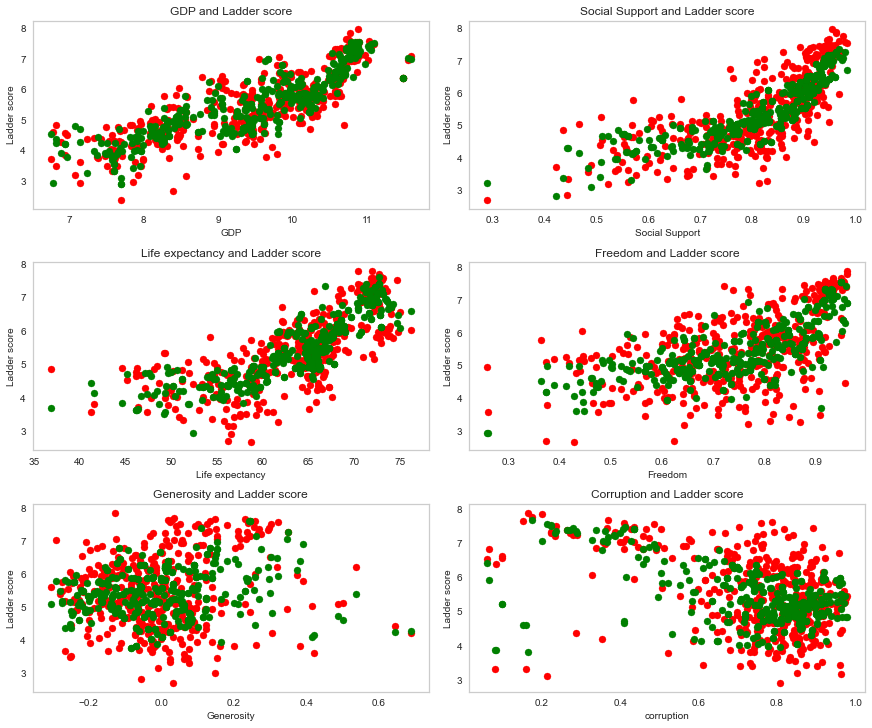

In [106]:
#Plotting scatter plots Red = real values, Green = predicted

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6) ) = plt.subplots(3, 2, figsize=(12, 10), constrained_layout=True)

# plot 1st one 
ax1.grid()
ax1.scatter(A_test, a_test, color = 'red')
ax1.scatter(A_test, a_pred, color='green')
ax1.set_ylabel('Ladder score', fontsize=10)
ax1.set_xlabel('GDP', fontsize=10)
ax1.title.set_text('GDP and Ladder score')

# plot 2nd one 
ax2.grid()
ax2.scatter(B_test, b_test, color = 'red')
ax2.scatter(B_test, b_pred, color='green')
ax2.set_ylabel('Ladder score', fontsize=10)
ax2.set_xlabel('Social Support', fontsize=10)
ax2.title.set_text('Social Support and Ladder score')

# plot 3rd one 
ax3.grid()
ax3.scatter(C_test, c_test, color = 'red')
ax3.scatter(C_test, c_pred, color='green')
ax3.set_ylabel('Ladder score', fontsize=10)
ax3.set_xlabel('Life expectancy', fontsize=10)
ax3.title.set_text('Life expectancy and Ladder score')

# plot 4th one 
ax4.grid()
ax4.scatter(D_test, d_test, color = 'red')
ax4.scatter(D_test, d_pred, color='green')
ax4.set_ylabel('Ladder score', fontsize=10)
ax4.set_xlabel('Freedom', fontsize=10)
ax4.title.set_text('Freedom and Ladder score')

# plot 5th one 
ax5.grid()
ax5.scatter(E_test, e_test, color = 'red')
ax5.scatter(E_test, e_pred, color='green')
ax5.set_ylabel('Ladder score', fontsize=10)
ax5.set_xlabel('Generosity', fontsize=10)
ax5.title.set_text('Generosity and Ladder score')

# plot 6th one 
ax6.grid()
ax6.scatter(F_test, f_test, color = 'red')
ax6.scatter(F_test, f_pred, color='green')
ax6.set_ylabel('Ladder score', fontsize=10)
ax6.set_xlabel('corruption', fontsize=10)
ax6.title.set_text('Corruption and Ladder score')

In [107]:
#filter the table using only the country at interest 
country = data.set_index('Country')
country.head()

year  Ladder score    GDP  Social support  Life expectancy  \
Country                                                                   
Afghanistan  2008         3.724  7.370           0.451            50.80   
Afghanistan  2009         4.402  7.540           0.552            51.20   
Afghanistan  2010         4.758  7.647           0.539            51.60   
Afghanistan  2011         3.832  7.620           0.521            51.92   
Afghanistan  2012         3.783  7.705           0.521            52.24   

             Freedom  Generosity  corruption  
Country                                       
Afghanistan    0.718       0.168       0.882  
Afghanistan    0.679       0.190       0.850  
Afghanistan    0.600       0.121       0.707  
Afghanistan    0.496       0.162       0.731  
Afghanistan    0.531       0.236       0.776

In [108]:
df3 = country.loc[['Italy', 'China', 'Australia', 'New Zealand', 'India', 'Peru', 'Finland', 'Egypt', 'United States']]
df3.head()

year  Ladder score     GDP  Social support  Life expectancy  Freedom  \
Country                                                                         
Italy    2007         6.574  10.727           0.912            72.26    0.684   
Italy    2008         6.780  10.711           0.880            72.44    0.543   
Italy    2009         6.334  10.652           0.880            72.62    0.701   
Italy    2010         6.354  10.666           0.872            72.80    0.738   
Italy    2011         6.057  10.671           0.913            72.84    0.568   

         Generosity  corruption  
Country                          
Italy         0.113       0.922  
Italy         0.049       0.946  
Italy         0.240       0.890  
Italy        -0.060       0.921  
Italy        -0.018       0.933

In [109]:
df4 = df3.loc[(df3['year']>=2018)].reset_index()
df4.head()

Country  year  Ladder score     GDP  Social support  Life expectancy  \
0   Italy  2018         6.517  10.650           0.913           73.600   
1   Italy  2019         6.445  10.655           0.838           73.800   
2   Italy  2020         6.488  10.563           0.890           74.000   
3   Italy  2021         6.483  10.623           0.880           73.800   
4   China  2021         5.339   9.673           0.811           69.593   

   Freedom  Generosity  corruption  
0    0.650      -0.021       0.888  
1    0.709      -0.082       0.866  
2    0.718      -0.150       0.844  
3    0.693      -0.084       0.866  
4    0.904      -0.146       0.755

In [110]:
import plotly.express as px
fig = px.area(df4, x="year", y="Ladder score", color='Country', markers=True)
fig.show()

In [111]:
fig = px.scatter_matrix(df4, dimensions=["GDP", "Social support", "Life expectancy", "Freedom" "Generosity", "corruption"], color="Country")
fig.show()

ValueError: Value of 'dimensions_3' is not the name of a column in 'data_frame'. Expected one of ['Country', 'year', 'Ladder score', 'GDP', 'Social support', 'Life expectancy', 'Freedom', 'Generosity', 'corruption'] but received: FreedomGenerosity